# Singfake Dataset

*In this notebook, the logistic regression, k-nearest neighbor, decision tree and Naive Bayes models were used for the detection of AI generated videos through investigating the relationship between the amount of views,likes and comments on the respective videos. The video data for this notebook was collected through the use of BiliBili's and Youtube's APIs.for this notebook 0 denotes real videos and 1 denotes fake videos.*

### Logistic Regression Implementation

In [1]:
import pandas as pd

col_names = ['set','language','singer','title','url','views','likes','comments','bonafide_or_spoof']

pdata = pd.read_csv('singfake_smote.csv', skiprows=1, names=col_names)

pdata.head(10)

,set,language,singer,title,url,views,likes,comments,bonafide_or_spoof
0,Training,Mandarin,Bella_Yao,姚贝娜——也许明天 很少有这样人人都说好听的歌,https://www.bilibili.com/video/BV1wx411U7YC/?s...,2337396,39087,3163,0
1,Training,Mandarin,Bella_Yao,【姚贝娜】 史诗绝唱《鱼》,https://www.bilibili.com/video/BV1kx411P7Xb/?s...,2149226,46190,4505,0
2,Training,Mandarin,Bella_Yao,【4K修复】姚贝娜《随它吧》MV（《冰雪奇缘》中文主题曲片尾流行版）,https://www.bilibili.com/video/BV1E8411W7RG/?s...,58577,1150,84,0
3,Training,Mandarin,Bella_Yao,【姚贝娜】听姚贝娜现场演唱《随它吧》，让人欲罢不能,https://www.bilibili.com/video/BV1CW411G7EQ/?s...,38177,303,49,0
4,Training,Mandarin,Bella_Yao,【4K 60fps】姚贝娜 - Beautiful Light 4K修复版 官方版MV 广汽...,https://www.bilibili.com/video/BV1mP4y1g7HX/?s...,5306,153,34,0
5,Training,Mandarin,Bella_Yao,姚贝娜经典歌曲《菩萨蛮》，好听到爆，可惜才女却不在了,https://www.bilibili.com/video/BV1yb411K7zM/?s...,627768,11234,268,0
6,Training,Mandarin,Bella_Yao,【姚贝娜】摇滚版《山歌好比春江水》 全程高能！很强很暴力！,https://www.bilibili.com/video/BV1pF411c7yV/?s...,8080,170,30,0
7,Training,Mandarin,Bella_Yao,【姚贝娜】元旦晚会唯美现场《画情》，直抵灵魂深处的好歌声,https://www.bilibili.com/video/BV1rx411L7Ay/?s...,63426,965,55,0
8,Training,Mandarin,Bella_Yao,【演出106】离不开你-姚贝娜,https://www.bilibili.com/video/BV1qb411k7bM/?s...,7607,132,24,0
9,Training,Mandarin,Bella_Yao,【姚贝娜】《我用所有报答爱》,https://www.bilibili.com/video/BV1DF411F7vn/?s...,8327,157,45,0


In [2]:
print(pdata.dtypes)

set                  object
language             object
singer               object
title                object
url                  object
views                 int64
likes                 int64
comments              int64
bonafide_or_spoof     int64
dtype: object


In [3]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

feat_col = ['views','likes','comments']

X = pdata[feat_col] 
y = pdata.bonafide_or_spoof



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(len(X_train))
print(len(y_train))

1046
1046


In [6]:
print(y_train)

770     0
543     0
289     0
10      0
147     1
       ..
1095    0
1130    0
1294    1
860     1
1126    0
Name: bonafide_or_spoof, Length: 1046, dtype: int64


In [7]:
print(X_train)

         views  likes  comments
770       4836    126         9
543      10243    243        23
289    2998410   8444       238
10        6600    187        73
147       6275    104        34
...        ...    ...       ...
1095  19289747  63510      4133
1130     39058    305        14
1294     13823    234        53
860       6493     48         8
1126    112251   1890       205

[1046 rows x 3 columns]


In [8]:
lrmodel = LogisticRegression(max_iter=200,random_state=42)

lrmodel.fit(X_train, y_train)

y_pred = lrmodel.predict(X_test)
y_pred 

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7862595419847328
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.60      0.73       123
           1       0.73      0.95      0.82       139

    accuracy                           0.79       262
   macro avg       0.82      0.78      0.78       262
weighted avg       0.82      0.79      0.78       262



In [10]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 

array([[ 74,  49],
       [  7, 132]])

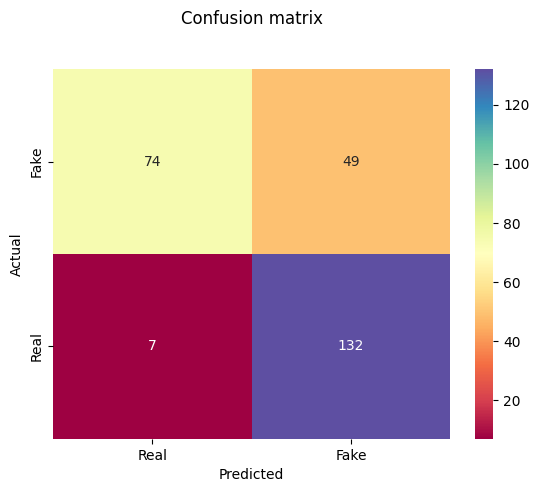

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Renders the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=sns.color_palette("Spectral", as_cmap=True) ,fmt='g',xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.ylabel('Actual') #Labels the Y axis as Actual
plt.xlabel('Predicted') #Labels the X axis as Predicted
plt.show()

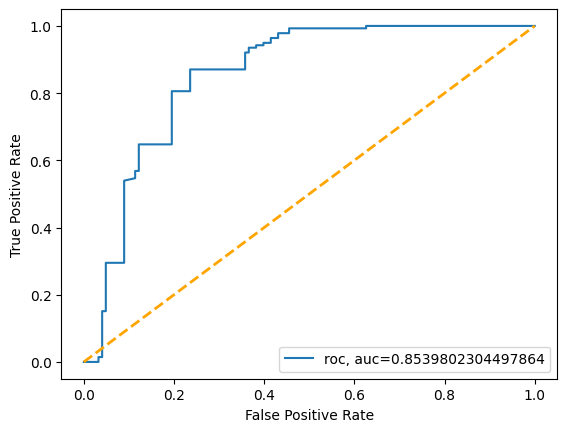

In [12]:
y_pred_proba = lrmodel.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposratelr, trueposratelr, _ = metrics.roc_curve(y_test,  y_pred_proba) #Gets the false positive rate and true positive rate
auclr = metrics.roc_auc_score(y_test, y_pred_proba) #Calculates AUC scaore
plt.plot(falseposratelr,trueposratelr,label="roc, auc="+str(auclr)) #Plots the false postive rate and true positive rate
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')#Shows diagonal line 
plt.legend(loc=4) #Sets location of the legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Conclusion Logistic Regression

*The Logistic Regression model yield an accuracy of 0.786 with and f1-score of 0.72 for real videos and 0.82 for fake videos and an ACU value of 0.854. This shows that this model can dectect the AI generated videos relatively well.*

## K-Nearest Neighbor

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

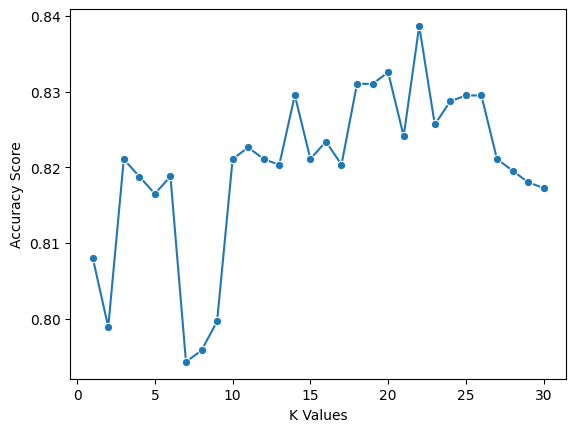

In [14]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [15]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [16]:
knnmodel = KNeighborsClassifier(n_neighbors=best_k) 

knnmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [17]:
print(len(X_train))
print(len(y_train))

1046
1046


In [18]:
y_pred_knn = knnmodel.predict(X_test)
y_pred_knn

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [19]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8473282442748091
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       123
           1       0.94      0.76      0.84       139

    accuracy                           0.85       262
   macro avg       0.86      0.85      0.85       262
weighted avg       0.86      0.85      0.85       262



In [20]:
cnf_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cnf_knn

array([[116,   7],
       [ 33, 106]])

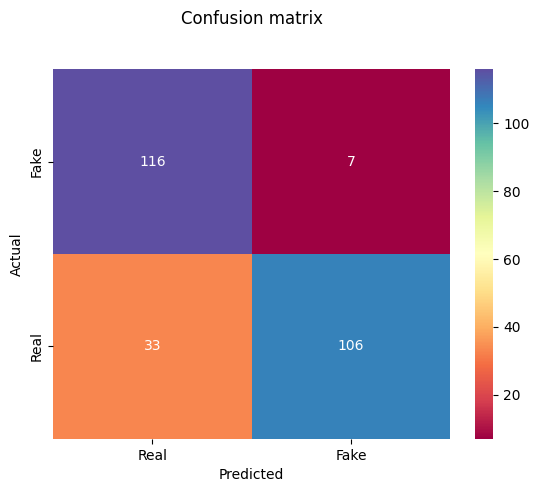

In [21]:
#Renders the Heatmap
sns.heatmap(cnf_knn, annot=True, fmt='d', cmap=sns.color_palette("Spectral", as_cmap=True),xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.xlabel('Predicted') #Labels the X axis as Actual
plt.ylabel('Actual') #Labels the Y axis as Predicted
plt.show()

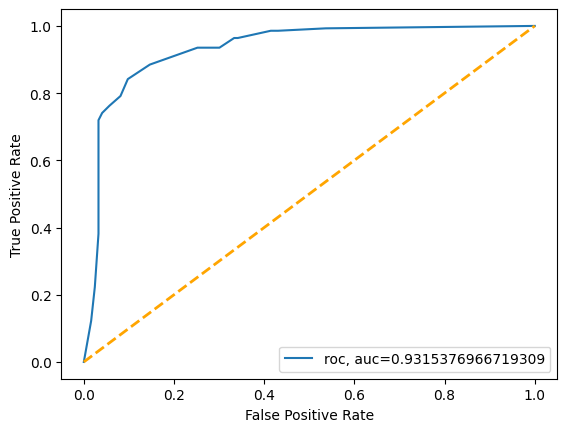

In [22]:
y_pred_proba_knn = knnmodel.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposrateknn, trueposrateknn, _ = metrics.roc_curve(y_test,  y_pred_proba_knn) #Gets the false positive rate and true positive rate
aucknn = metrics.roc_auc_score(y_test, y_pred_proba_knn) #Calculates AUC score
plt.plot(falseposrateknn,trueposrateknn,label="roc, auc="+str(aucknn)) #Plots the false postive rate and true positive rate
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')#Shows diagonal line 
plt.legend(loc=4) #Sets location of the legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Conclusion for K-Nearest Neighbor

*The K-Nearest Neighbor model yield an accuracy of 0.847 with and f1-score of 0.85 for real videos and 0.84 for fake videos and an ACU value of 0.932. This shows that this model can dectect the AI generated videos better than the Logisitic Regression model and the Decision Tree model.*

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 42, max_depth=3)

In [24]:
dtc = dtc.fit(X_train,y_train)

In [25]:
y_pred_dtc = dtc.predict(X_test)
y_pred_dtc

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [26]:
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_dtc))

Accuracy: 0.8740458015267175
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       123
           1       0.86      0.91      0.89       139

    accuracy                           0.87       262
   macro avg       0.88      0.87      0.87       262
weighted avg       0.88      0.87      0.87       262



In [27]:
cnf_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cnf_dtc

array([[102,  21],
       [ 12, 127]])

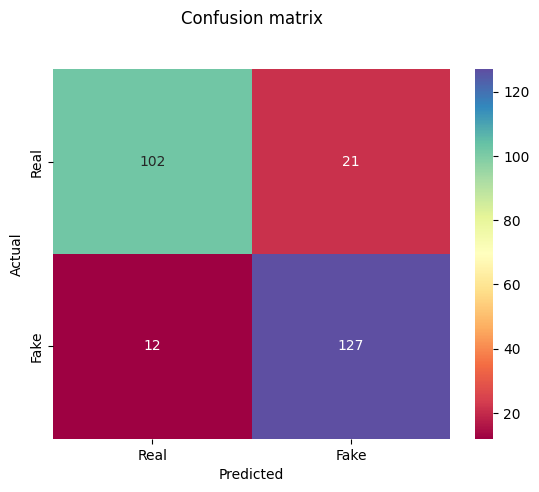

In [38]:
sns.heatmap(cnf_dtc, annot=True, fmt='d', cmap=sns.color_palette("Spectral", as_cmap=True),xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.xlabel('Predicted') #Labels the X axis as Actual
plt.ylabel('Actual') #Labels the Y axis as Predicted
plt.show()

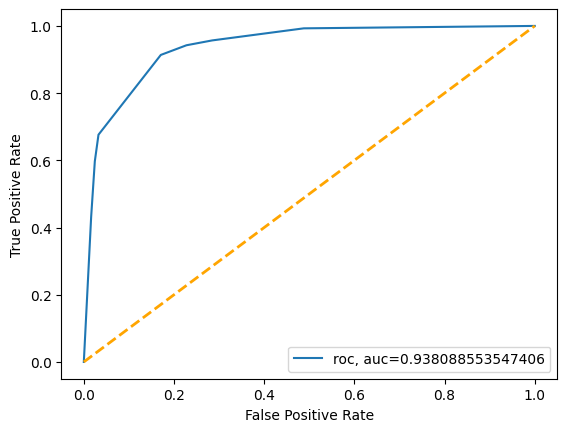

In [29]:
y_pred_proba_dtc = dtc.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposratedtc, trueposratedtc, _ = metrics.roc_curve(y_test,  y_pred_proba_dtc) #Gets the false positive rate and true positive rate
aucdtc = metrics.roc_auc_score(y_test, y_pred_proba_dtc) #Calculates AUC score
plt.plot(falseposratedtc,trueposratedtc,label="roc, auc="+str(aucdtc)) #Plots the false postive rate and true positive rate
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--') #Shows diagonal line 
plt.legend(loc=4) #Sets location of the legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

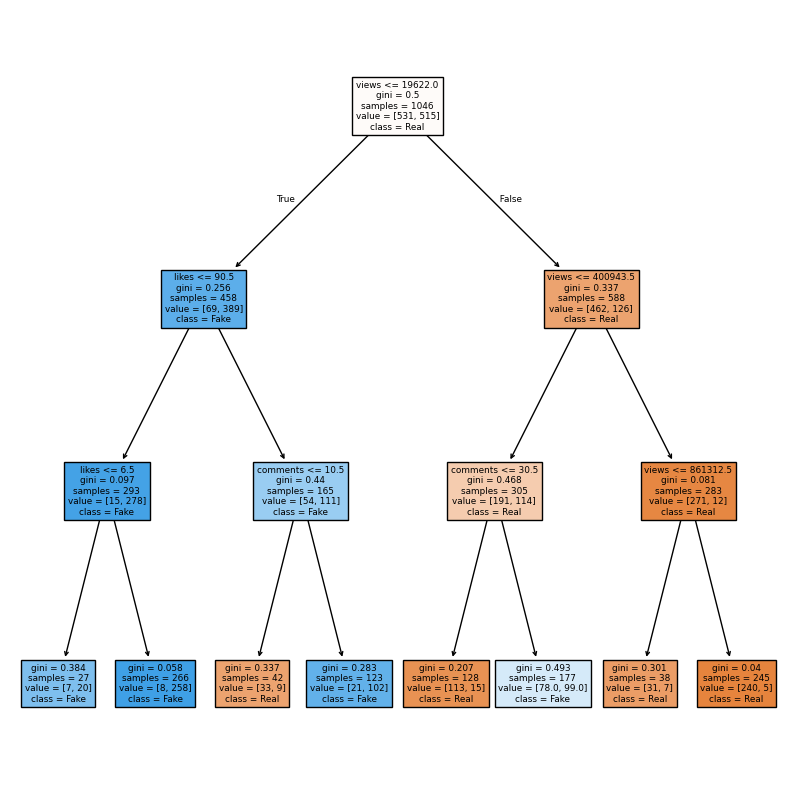

In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(10, 10))

tree.plot_tree(dtc, class_names=["Real","Fake"], feature_names=feat_col,filled=True)
plt.savefig('dtc.png')
plt.show() 


### Conclusion for Decision Tree

*The Decision Tree model yield an accuracy of 0.874 with and f1-score of 0.86 for real videos and 0.89 for fake videos and an ACU value of 0.938. This shows that this model can dectect the AI generated videos better than the Logistic Regression model but not as well as the K-Nearest Neighbor model.*

# Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)

GaussianNB()

In [50]:
y_pred_nb = nbmodel.predict(X_test)
y_pred_nb

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [51]:
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.7480916030534351
              precision    recall  f1-score   support

           0       0.98      0.47      0.64       123
           1       0.68      0.99      0.81       139

    accuracy                           0.75       262
   macro avg       0.83      0.73      0.72       262
weighted avg       0.82      0.75      0.73       262



In [52]:
cnf_nb = metrics.confusion_matrix(y_test, y_pred_nb)
cnf_nb

array([[ 58,  65],
       [  1, 138]])

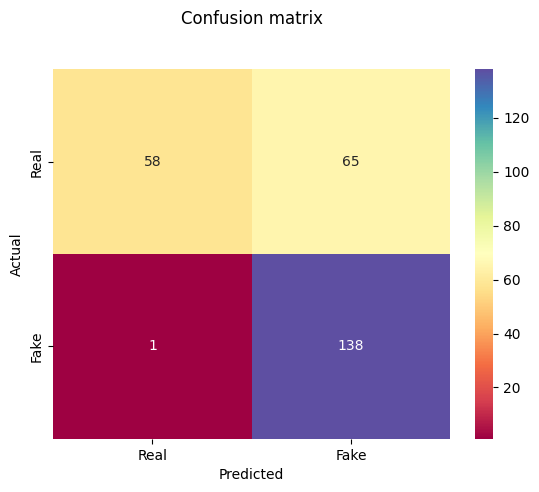

In [53]:
sns.heatmap(cnf_nb, annot=True, fmt='d', cmap=sns.color_palette("Spectral", as_cmap=True),xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.xlabel('Predicted') #Labels the X axis as Actual
plt.ylabel('Actual') #Labels the Y axis as Predicted
plt.show()

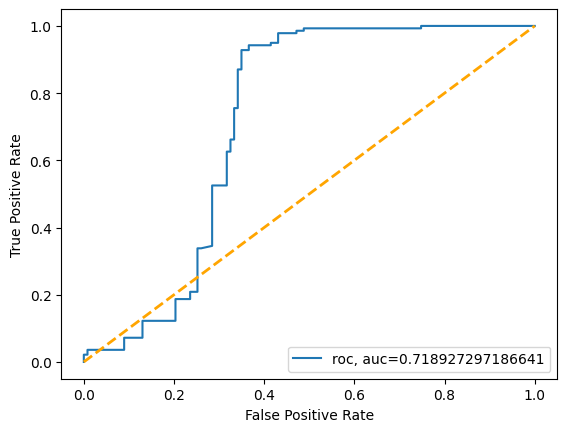

In [54]:
y_pred_proba_nb = nbmodel.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposratenb, trueposratenb, _ = metrics.roc_curve(y_test,  y_pred_proba_nb) #Gets the false positive rate and true positive rate
aucnb = metrics.roc_auc_score(y_test, y_pred_proba_nb) #Calculates AUC score
plt.plot(falseposratenb,trueposratenb,label="roc, auc="+str(aucnb)) #Plots the false postive rate and true positive rate
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--') #Shows diagonal line 
plt.legend(loc=4) #Sets location of the legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Baseline

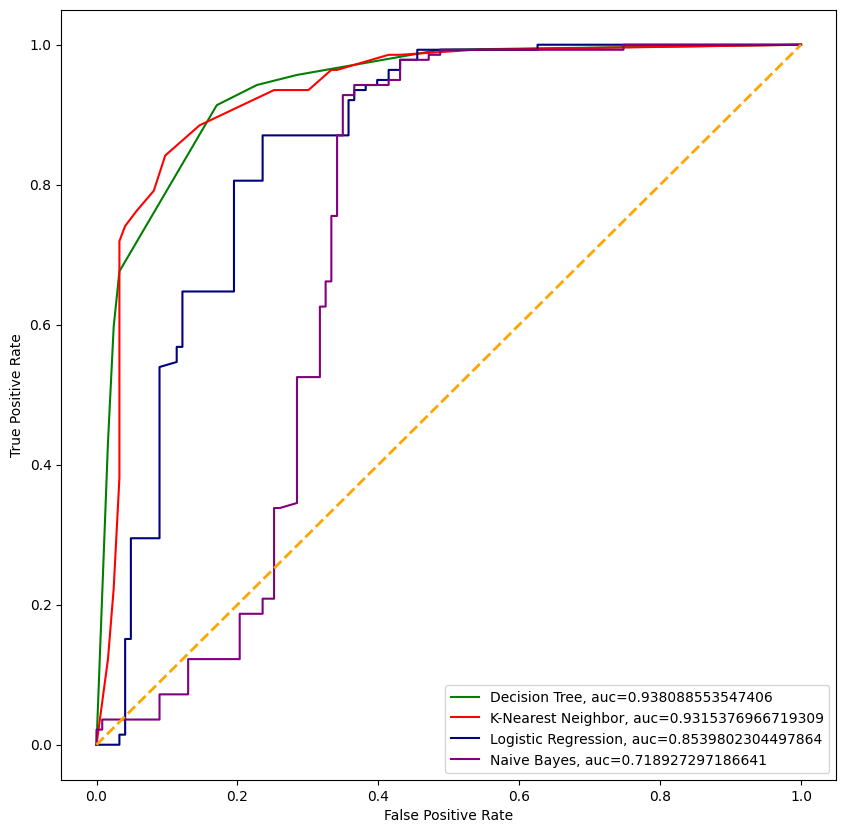

In [56]:
plt.figure(figsize=(10, 10))
plt.plot(falseposratedtc,trueposratedtc,color='green',label="Decision Tree, auc="+str(aucdtc))
plt.plot(falseposrateknn,trueposrateknn,color='red',label="K-Nearest Neighbor, auc="+str(aucknn))
plt.plot(falseposratelr,trueposratelr,color='navy',label="Logistic Regression, auc="+str(auclr))
plt.plot(falseposratenb,trueposratenb,color='purple',label="Naive Bayes, auc="+str(aucnb))
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.legend(loc=4) #Sets location of the legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('modelroc.png')
plt.show()

# Model Table

| Model                 | Accuracy | AUC  |    | Precision | Recall | F1-Score |
|:---------------------:|:--------:|:----:|:--:|:---------:|:------:|:--------:|
| Logistic regression   | 0.786    | 0.854| 0  | 0.91      | 0.60   | 0.73     |
|                       |          |      |----|-----------|--------|----------| 
|                       |          |      | 1  | 0.73      | 0.95   | 0.84     |
|-----------------------|----------|------|----|-----------|--------|----------|
| **K-Nearest Neighbor**| 0.874    | 0.932| 0  | 0.78      | 0.94   | 0.85     |
|                       |          |      |----|-----------|--------|----------| 
|                       |          |      | 1  | 0.94      | 0.76   | 0.84     |
|-----------------------|----------|------|----|-----------|--------|----------|
| **Decision Tree**     | 0.874    | 0.938| 0  | 0.89      | 0.83   | 0.86     |
|                       |          |      |----|-----------|--------|----------| 
|                       |          |      | 1  | 0.86      | 0.91   | 0.89     |
|-----------------------|----------|------|----|-----------|--------|----------|
| Naive Bayes           | 0.748    | 0.719| 0  | 0.98      | 0.47   | 0.64     |
|                       |          |      |----|-----------|--------|----------| 
|                       |          |      | 1  | 0.68      | 0.99   | 0.81     |
|-----------------------|----------|------|----|-----------|--------|----------|

##### NB: 
*Some values may be rounded up to the third decimal place.*

# Cleaning and Balancing the Data

| Percentage Removed | Balancing Algorithms      |
|:------------------:|:-------------------------:|
| 11.74              | Exploratory Data Analysis |
|                    |---------------------------|
|                    | Smote                     |
|--------------------|---------------------------|

## Conclusion

*In conclusion, the decision tree model and K-Nearest Neighbor performed the best with the Singfake dataset with an accuracy of 0.874. However, K-Nearest Neighbor had the higher accuracy with 0.8743. In terms of the AUC score Decision Tree performed better with a score of 0.938. The model that performed the worst with the dataset is the Naive Bayes model with an accuracy of 0.748 and and AUC score of 0.719. The cause of this can be due to the dataset being of a small size of only 1304 samples and there being only three features used in this classification.*